# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import seaborn as sns
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv', index_col = 0)
south_df = pd.read_csv('SouthCallCenter.csv', index_col = 0)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  
ANSWER: 9

In [2]:
#Code Used:
north_df['Rep ID'].nunique()


9

#### EDA Question 1B:  How many reps are in the South branch?  
ANSWER: 11

In [3]:
#Code Used:
south_df['Rep ID'].nunique()


11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
#Code Used:
north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].agg(['mean'])


,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
mean,9.987755,1.914286,3.04878,2.967347


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
#Code Used:
south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].agg(['mean'])


,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
mean,10.05414,1.910828,3.0,3.076433


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# Code Used:
# First I concatenate the north and south dataframes:
ns = pd.concat([north_df, south_df], ignore_index=True)
ns


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [7]:
# Now let's group this combined dataframe by Time Block and do a count of the calls:
time_count_dict = {'Time Block' : 'count'}
ns_timeblock = ns.groupby('Time Block').agg(time_count_dict)
ns_timeblock


,Time Block
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: The 'Incoming Wait Time' column is the only column missing any values, but it's missing quite a few. However, upon closer inspection, it's only missing values in rows where the call is listed as 'Outgoing,' so that makes logical sense. We'll leave those null values alone!


In [8]:
# Code Used
# Add Additional Cells as needed.
# First, let's look at the info to see the non-null values in each column:
ns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 559 non-null    object 
 1   Call Purpose           559 non-null    object 
 2   Time Block             559 non-null    object 
 3   Incoming or Outgoing   559 non-null    object 
 4   Queue                  559 non-null    object 
 5   Rep ID                 559 non-null    object 
 6   Sale                   559 non-null    object 
 7   Lost Call              559 non-null    int64  
 8   Abandoned              559 non-null    int64  
 9   Busy Minutes           559 non-null    int64  
 10  Not Ready Minutes      559 non-null    int64  
 11  Incoming Wait Time     208 non-null    float64
 12  During Call Wait Time  559 non-null    int64  
 13  Calls                  559 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 61.3+ KB


In [9]:
# That looks surprisingly complete! The 'Incoming Wait Time' column is the only one missing any values.
# That's not a column that we can drop because we'll be using the information to answer questions, 
# so let's take a closer look and find some patterns.
ns['Incoming or Outgoing'].value_counts()
# Looks like there are exactly 208 incoming calls, 
# so maybe that's why there are exactly 208 non-null values for Incoming Wait Time!
# Perhaps we'll just leave those null, since it's most informative.


Outgoing    351
Incoming    208
Name: Incoming or Outgoing, dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: First I observed the values with a value count, then I tried to see if there was anything notable in the observations. I figured it was probably an extra space after one of the "YES" strings, so I trimmed all values in that column using str.strip().

In [10]:
#Code Used
# Add Additional Cells as needed.
# Let's get a good look at the Sale values for the North branch:
north_df['Sale'].value_counts()


NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [11]:
# That's weird. Maybe there's a space after one or something. Let's look at South.
south_df['Sale'].value_counts()


NO     308
YES      6
Name: Sale, dtype: int64

In [12]:
# Ok, we'll try stripping the trailing and leading whitespace from those values.
north_df['Sale'] = north_df['Sale'].str.strip()


In [13]:
# Success!
north_df['Sale'].value_counts()


NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There were 2 duplicates in the north branch's dataset and 3 duplicates in the south branch's dataset. However, there's no reason to think these are true duplicates, since it's likely that reps take lots of calls of the same variety in the same time block, etc.

In [14]:
#Code Used
# Add Additional Cells as needed.
# Let's check North first:
n_isdup = north_df.duplicated().any()
n_isdup


True

In [16]:
# Let's take a look at the duplicates from the North branch.
n_see_dups = north_df[north_df.duplicated()]
n_see_dups
# I think it's totally possible that Joe took 2 Sales Support calls around noon. 
# There's no reason to think either of these are true duplicates. 


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [24]:
# Just for fun, let's do the same thing for the South branch!
s_see_dups = south_df[south_df.duplicated()]
s_see_dups


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The three main types of unnecessary data are uninformative/repetitive data, irrelevant data, and duplicates. We've already look at the duplicates from each branch's data. Looking at the head of the North dataframe, much of this information has been irrelevant to us so far(Incoming/Outgoing, Call Purpose, etc), but I imagine it may come up later.

In [25]:
#Code Used
# Add Additional Cells as needed.
north_df.head()
#Looks good to me! We might not use some of these columns, but I won't know until later.


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [26]:
south_df.head()
# Yes, I think we should keep all of this.


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [27]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], ignore_index=True)
df


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls


In [28]:
# Code Used
# Add Additional Cells as needed.
# Group by Rep ID and sum the resulting structure:
df_rep_sum = df.groupby(['Branch', 'Rep ID']).agg('sum', numeric_only=True)
df_rep_sum


Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
North  Amanda          0          1           229                 43   
       Andy            0          3           228                 43   
       Brent           0          1           362                 71   
       Cam             1          0           233                 46   
       Duke            2          0           292                 56   
       Joe             0          0           256                 49   
       Lilly           0          2           307                 59   
       Todd            1          0           296                 58   
       Xander          1          0           244                 44   
South  Alice           0          0           199                 46   
       Eric            0          0           361                 54   
       George          0          0           298                 53   
       Helga           0          2           292                 58   
       Josh            3          0           260                 50   
       Karl            1          0           287                 61   
       Kate            0          0           291                 61   
       Randy           3          1           320                 66   
       Sandy           1          0           325                 60   
       Sharon          1          1           257                 38   
       Susan           2          0           267                 53   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Amanda                12.0                     60     23  
       Andy                  36.0                     65     23  
       Brent                 17.0                    117     37  
       Cam                   32.0                     66     24  
       Duke                  39.0                     85     29  
       Joe                   36.0                     81     26  
       Lilly                 37.0                     88     30  
       Todd                  21.0                     97     29  
       Xander                20.0                     68     24  
South  Alice                 15.0                     58     20  
       Eric                  47.0                    112     35  
       George                41.0                     87     29  
       Helga                 36.0                     95     31  
       Josh                  31.0                     83     26  
       Karl                  26.0                     85     28  
       Kate                  37.0                     83     29  
       Randy                 47.0                     98     33  
       Sandy                 34.0                    100     32  
       Sharon                29.0                     77     25  
       Susan                 35.0                     88     26

In [29]:
# Sort by calls to determine which rep in each branch has the highest number of calls.
df_rep_sum.sort_values('Calls', ascending=False)


Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
North  Brent           0          1           362                 71   
South  Eric            0          0           361                 54   
       Randy           3          1           320                 66   
       Sandy           1          0           325                 60   
       Helga           0          2           292                 58   
North  Lilly           0          2           307                 59   
       Duke            2          0           292                 56   
       Todd            1          0           296                 58   
South  Kate            0          0           291                 61   
       George          0          0           298                 53   
       Karl            1          0           287                 61   
       Josh            3          0           260                 50   
       Susan           2          0           267                 53   
North  Joe             0          0           256                 49   
South  Sharon          1          1           257                 38   
North  Xander          1          0           244                 44   
       Cam             1          0           233                 46   
       Andy            0          3           228                 43   
       Amanda          0          1           229                 43   
South  Alice           0          0           199                 46   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Brent                 17.0                    117     37  
South  Eric                  47.0                    112     35  
       Randy                 47.0                     98     33  
       Sandy                 34.0                    100     32  
       Helga                 36.0                     95     31  
North  Lilly                 37.0                     88     30  
       Duke                  39.0                     85     29  
       Todd                  21.0                     97     29  
South  Kate                  37.0                     83     29  
       George                41.0                     87     29  
       Karl                  26.0                     85     28  
       Josh                  31.0                     83     26  
       Susan                 35.0                     88     26  
North  Joe                   36.0                     81     26  
South  Sharon                29.0                     77     25  
North  Xander                20.0                     68     24  
       Cam                   32.0                     66     24  
       Andy                  36.0                     65     23  
       Amanda                12.0                     60     23  
South  Alice                 15.0                     58     20

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.88%
- South Branch = 1.28%
- Company Wide = 1.99%
- Do any of these fall out of the optimal range of 2-5%? Yes, the South branch and the company as a whole have average call abandonment rates below 2%. My initial reaction is that it's silly to create a lower boundary for that KPI. However, perhaps they're using this boundary to tell them if they have too many reps sitting around with not enough work to do.

In [30]:
# Code Used
# Add Additional Cells as needed.
# North branch average call abandonment rate:
north_abandon = (north_df['Abandoned'].sum())/(north_df['Calls'].sum())*100
north_abandon


2.857142857142857

In [31]:
# South branch average call abandonment rate:
south_abandon = (south_df['Abandoned'].sum())/(south_df['Calls'].sum())*100
south_abandon


1.2738853503184715

In [32]:
# Company average call abandonment rate:
company_abandon = (df['Abandoned'].sum())/(df['Calls'].sum())*100
company_abandon


1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 20.51% of 78 calls
- South Branch = 16.13% of 124 calls
- Company Wide = 17.82% of 202 calls

If we're looking at the Incoming Wait Time, the service level for the whole company is 17.82%. 
The North branch has a service level of 20.51% and the South branch has a service level of 16.13%.
Total company calls: 202 calls, 
Total North branch calls: 78 calls, 
Total South branch calls: 124 calls.


In [33]:
# Code Used
# Add Additional Cells as needed.
# Let's start by making a dataframe of ONLY the incoming calls that were actually connected in the North branch:
north_incoming = north_df[north_df['Incoming or Outgoing'] == 'Incoming']
north_connected = north_incoming[north_incoming['Abandoned'] == 0]
north_connected = north_connected[north_connected['Lost Call'] == 0]
north_connected['Lost Call'].value_counts()


0    78
Name: Lost Call, dtype: int64

In [34]:
# Now we'll do the same for the South branch:
# Let's start by making a dataframe of ONLY the incoming calls that were actually connected in the South branch:
south_incoming = south_df[south_df['Incoming or Outgoing'] == 'Incoming']
south_connected = south_incoming[south_incoming['Abandoned'] == 0]
south_connected = south_connected[south_connected['Lost Call'] == 0]
south_connected['Lost Call'].value_counts()


0    124
Name: Lost Call, dtype: int64

In [35]:
# Finally, we'll make a 'connected' dataframe for the whole company.
df_incoming = df[df['Incoming or Outgoing'] == 'Incoming']
df_connected = df_incoming[df_incoming['Abandoned'] == 0]
df_connected = df_connected[df_connected['Lost Call'] == 0]
df_connected['Lost Call'].value_counts()


0    202
Name: Lost Call, dtype: int64

In [51]:
# So let's calculate the Service Time KPI:
total_calls_n = north_connected['Incoming Wait Time'].count()
total_calls_s = south_connected['Incoming Wait Time'].count()
total_calls_company = total_calls_n + total_calls_s
service_level_company = (df_connected['Incoming Wait Time'].loc[df['Incoming Wait Time'] < 2].count()/total_calls_company*100).round(2)
service_level_north = (north_connected['Incoming Wait Time'].loc[north_connected['Incoming Wait Time'] < 2].count()/total_calls_n*100).round(2)
service_level_south = (south_connected['Incoming Wait Time'].loc[south_connected['Incoming Wait Time'] < 2].count()/total_calls_s*100).round(2)
print(f"If we're looking at the Incoming Wait Time, the service level for the whole company is {service_level_company}%. \nThe North branch has a service level of {service_level_north}% and the South branch has a service level of {service_level_south}%.")
print(f"Total company calls: {total_calls_company} calls, \nTotal North branch calls: {total_calls_n} calls, \nTotal South branch calls: {total_calls_s} calls.")


If we're looking at the Incoming Wait Time, the service level for the whole company is 17.82%. 
The North branch has a service level of 20.51% and the South branch has a service level of 16.13%.
Total company calls: 202 calls, 
Total North branch calls: 78 calls, 
Total South branch calls: 124 calls.


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.06
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [41]:
# Code Used 
# Ok, initially I thought this was supposed to include busy minutes and not-ready minutes, 
# but I'm told it's only Incoming Wait Time.
# Let's calculate the average speed of answer for the North branch!
print(f"North Branch in seconds = {(north_connected['Incoming Wait Time'].sum()/north_connected['Incoming or Outgoing'].count()).round(2)}")

# It worked! 


North Branch in seconds = 3.06


In [42]:
# Let's do it for the South branch and the company as a whole next, then we'll find the averages.
print(f"South Branch in seconds = {(south_connected['Incoming Wait Time'].sum()/south_connected['Incoming or Outgoing'].count()).round(2)}")
print(f"Company Wide in seconds = {(df_connected['Incoming Wait Time'].sum()/df_connected['Incoming or Outgoing'].count()).round(2)}")


South Branch in seconds = 3.0
Company Wide in seconds = 3.02


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

Abandonment rates:

{'A': '4.26%', 'B': '2.01%', 'C': '0.73%', 'D': '1.72%'}

> Chart style you chose and why: First, I made a stacked bar chart to visualize the abandoned calls along with the unabandoned calls per queue. But I can tell this question wants me to focus on the average abandonment rate per queue, so I did a regular bar chart after that, which is a good way to compare the rates between the different queues.

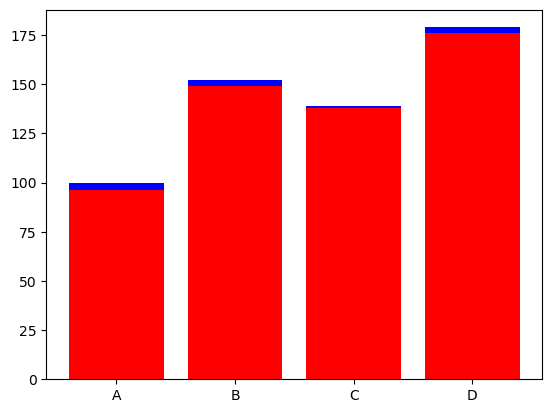

In [43]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
abandoned = []
unabandoned = []
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    abandoned.append(queue_dict["Abandoned"][i])
    unabandoned.append(queue_dict["Calls"][i])

#Your Code Here:
# First I had fun making this stacked bar chart, but I know that's not exactly what the question is asking for, so I'll 
# plot the abandonment rates in a regular bar chart in the next code block.
plt.bar(queues, unabandoned, color='r')
plt.bar(queues, abandoned, bottom=unabandoned, color='b')
plt.show()


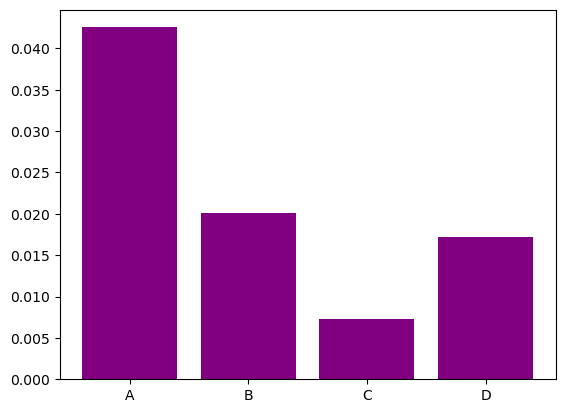

In [40]:
# Abandonment rates bar chart:
plt.bar(queues, abandonment_rates.values(), color='purple')
plt.show()


In [44]:
values = list(abandonment_rates.values())
keys = list(abandonment_rates.keys())
for i in range(4):
    values[i] = f"{round(values[i]*100, 2)}%"
    abandonment_rates[keys[i]] = values[i]
    

print(f"The abandonment rates are: \n{abandonment_rates}")


The abandonment rates are: 
{'A': '4.17%', 'B': '2.01%', 'C': '0.72%', 'D': '1.7%'}


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
I made a horizontal bar chart that displays the service level percentage and average speed for each rep. I like that it's easy to read and easy to make comparisons.

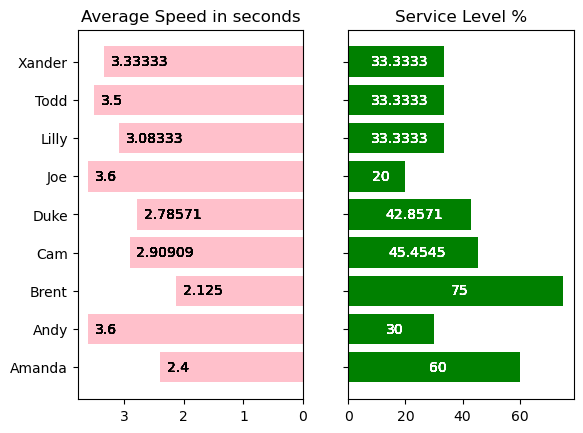

In [52]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
reps = north_df['Rep ID'].unique()
reps.sort()

avg_speed = north_plt['Incoming Wait Time'].tolist()

rep_service = service_level['Service Level %'].tolist()

y = reps
x1 = avg_speed
x2 = rep_service

fig, axes = plt.subplots(ncols=2, sharey=True)
p0 = axes[0].barh(y, x1, align='center', color='pink')
p1 = axes[1].barh(y, x2, align='center', color='green')
axes[0].invert_xaxis()
axes[0].set(title = 'Average Speed in seconds')
axes[1].set(title = 'Service Level %')
for speed in avg_speed:
    axes[0].bar_label(p0, label_type='edge', padding=5)
for service in rep_service:
    axes[1].bar_label(p1, label_type ='center',color='white',padding=3)
plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
I chose a grouped bar chart so we could easily compare incoming vs outgoing calls per call purpose type.

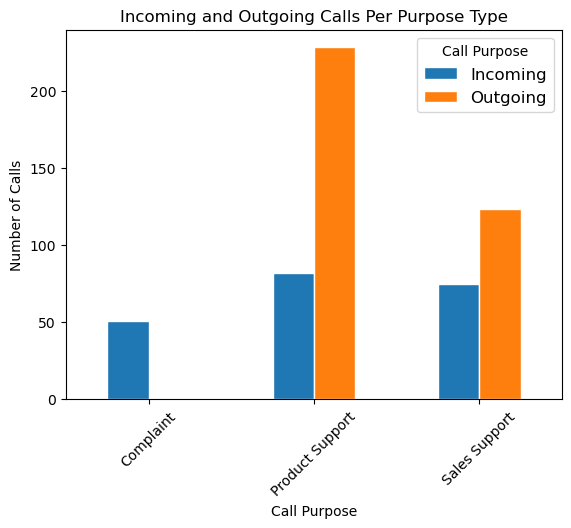

In [46]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need.

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
purpose_dict = {
    'Call Purpose' : call_purpose,
    'Incoming' : [51, 82, 75],
    'Outgoing' : [0, 228, 123]
}
df_purpose = pd.DataFrame(purpose_dict).set_index('Call Purpose')

df_purpose.plot.bar(edgecolor = 'white')
plt.title('Incoming and Outgoing Calls Per Purpose Type')
plt.xticks(color = 'black', rotation=45)
plt.yticks(color = 'black')
plt.xlabel('Call Purpose')
plt.ylabel('Number of Calls')
plt.legend(title='Call Purpose', fontsize=12, labelcolor='black')

plt.show()


## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
The North Branch outperforms the South branch for almost every KPI, but they have a lower call volume (245 entries in their dataframe, compared to 314 for the South branch).
For example, the service level KPI is about 4 percentage points greater for the North branch, but that's for 78 connected calls vs 124 connected calls for the South branch. Perhaps the South branch is overworked.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
The South branch would benefit most, I believe.
The North branch has 9 reps receiving 245 calls (~27.2 calls per rep), while the South branch has 11 reps receiving 314 calls (~28.6 calls per rep). The average speed of answer is slightly faster in the South branch (3.00s compared to 3.06 seconds), but the service level is so much better in the North branch. I wonder if a few high-performers are skewing these numbers.



#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
Length of call would be a good metric, because I noticed that the During Call Wait Time was higher in the South branch, which makes me think that the reps have to wait a while to get answers from superiors, so maybe after they hire more reps, they can promote some reps to management to help with the During Call Wait Time.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: